Environment: Observing

Run: initialize_sas.bash

In [1]:
import sys
module_path = '/Users/woodml/Code/XMM_SAS/xmmsas_20230412_1735/lib/python' # or the path to your source code
sys.path.insert(0, module_path)
%env SAS_PATH=/Users/woodml/Code/XMM_SAS/xmmsas_20230412_1735
from pysas.wrapper import Wrapper as w
import os
import os.path
from os import path
import numpy as np
from astropy.io import fits
from astropy.table import Table

from extraction_fcns import extract_lc, extract_spectrum, plot_LC, plot_region, plot_spectrum, rolling_median

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Georgia']
rcParams['font.weight'] = 'bold'
rcParams['axes.labelweight'] = 'bold'
rcParams['axes.linewidth'] = 1

env: SAS_PATH=/Users/woodml/Code/XMM_SAS/xmmsas_20230412_1735


In [9]:
work_dir = '/Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/'
sas_file = '/Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/'

inargs = [f'sas_ccf={sas_file}ccf.cif', f'sas_odf={sas_file}0327_0101440801_SCX00000SUM.SAS', f'workdir={work_dir}']

w('startsas', inargs).run()

startsas - WARNING - Executing /Users/woodml/Code/XMM_SAS/xmmsas_20230412_1735/lib/python/pysas/startsas/startsas.py {'odfid': '', 'workdir': '/Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/', 'sasfiles': 'yes', 'sas_ccf': '/Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/ccf.cif', 'sas_odf': '/Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/0327_0101440801_SCX00000SUM.SAS', 'level': 'ODF', 'cifbuild_opts': '', 'odfingest_opts': ''}
startsas - ERROR - Summary file PATH /Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/0101440801 does not exist.




        Starting SAS session
    
        Working directory = /Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/
    
        
SAS_CCF = /Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/ccf.cif


Exception: Summary file PATH /Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/0101440801 does not exist.

# LC's
Plot LC's to get time limits.
LC's extracted in the other notebook (Extraction.ipynb)

In [2]:
# Load 2002 Lightcurves
hdul = fits.open('/Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/SUAur_0101440801_combined.lc')
lc = Table(hdul[1].data)
x = np.arange(hdul[1].header['TSTART'], hdul[1].header['TSTOP'], hdul[1].header['TIMEDEL'])
y = np.sum(lc['RATE'], 1)
y_err = np.sum(lc['ERROR'], 1)

hdul = fits.open('/Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/SUAur_0101440801_combined_soft.lc')
lc_soft = Table(hdul[1].data)
x_soft = np.arange(hdul[1].header['TSTART'], hdul[1].header['TSTOP'], hdul[1].header['TIMEDEL'])
y_soft = np.sum(lc_soft['RATE'], 1)
y_err_soft = np.sum(lc_soft['ERROR'], 1)

hdul = fits.open('/Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/SUAur_0101440801_combined_hard.lc')
lc_hard = Table(hdul[1].data)
x_hard = np.arange(hdul[1].header['TSTART'], hdul[1].header['TSTOP'], hdul[1].header['TIMEDEL'])
y_hard = np.sum(lc_hard['RATE'], 1)
y_err_hard = np.sum(lc_hard['ERROR'], 1)

/Users/woodml/anaconda3/envs/Observing/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


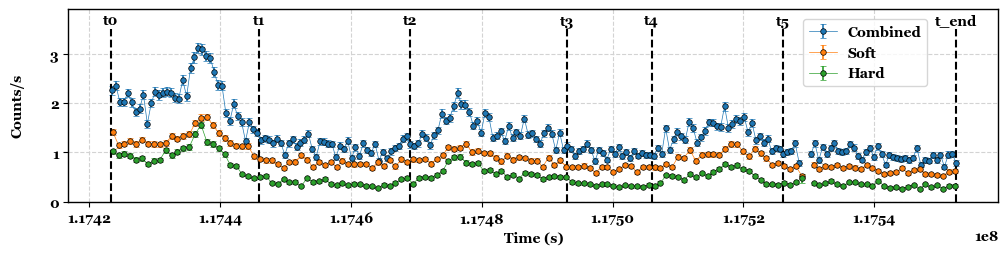

In [27]:
# Plot all SU Aur LCs, 0101440801
x3 = np.array([np.median(x[i:i+3]) for i in range(0,len(x),3)])
y3 = np.array([np.sum(y[i:i+3]) for i in range(0,len(x),3)])
y_err3 = np.array([np.sum(y_err[i:i+3])/3 for i in range(0,len(x),3)])

xs3 = np.array([np.median(x_soft[i:i+3]) for i in range(0,len(x_soft),3)])
ys3 = np.array([np.sum(y_soft[i:i+3]) for i in range(0,len(x_soft),3)])
ys_err3 = np.array([np.sum(y_err_soft[i:i+3])/3 for i in range(0,len(x_soft),3)])

xh3 = np.array([np.median(x_hard[i:i+3]) for i in range(0,len(x_hard),3)])
yh3 = np.array([np.sum(y_hard[i:i+3]) for i in range(0,len(x_hard),3)])
yh_err3 = np.array([np.sum(y_err_hard[i:i+3])/3 for i in range(0,len(x_hard),3)])

ratio_err = 2/(yh3+ys3)**2 * np.sqrt(ys3**2*yh_err3**2 + yh3**2*ys_err3**2)

t0 = 117423319
t1 = 117446000  # first flare end
t2 = 117469000  # second flare start
t3 = 117493000  # second flare end
t4 = 117506000  # third flare start
t5 = 117526000  # third flare end
t_end = x3[-1]

plt.figure(figsize=(12,2.5))
plt.errorbar(x3, y3, yerr=y_err3, lw=0.5, ms=8, marker='.', markeredgecolor='k', markeredgewidth=.5, capsize=2, elinewidth=1.2, label='Combined')
plt.errorbar(xs3, ys3, yerr=ys_err3, lw=0.5, ms=8, marker='.', markeredgecolor='k', markeredgewidth=.5, capsize=2, elinewidth=1.2, label='Soft')
plt.errorbar(xh3, yh3, yerr=yh_err3, lw=0.5, ms=8, marker='.', markeredgecolor='k', markeredgewidth=.5, capsize=2, elinewidth=1.2, label='Hard')
plt.vlines([t0, t1, t2, t3, t4, t5, t_end], 0, 3.5, 'k', '--')
plt.text(t0, 3.6, 't0', ha='center')
plt.text(t1, 3.6, 't1', ha='center')
plt.text(t2, 3.6, 't2', ha='center')
plt.text(t3, 3.6, 't3', ha='center')
plt.text(t4, 3.6, 't4', ha='center')
plt.text(t5, 3.6, 't5', ha='center')
plt.text(t_end, 3.6, 't_end', ha='center')
plt.grid('both','major',c='lightgray',ls='--', zorder=0)
plt.xlabel('Time (s)')
plt.ylabel('Counts/s', labelpad=18)
plt.ylim(0, 3.9)
plt.legend(loc=(0.79, 0.6))
plt.show()

# Extract Spectra
Now I need to worry about separating out the flare. Here I am testing the difference between different quiescent extractions. Final spectra are extracted in the other notebook (Extraction.ipynb)

There are three flares visible in the LC. The first is big and the second two are small. We are going to extract three spectra to test the differences:
1. Just the first (big) flare (Flare 1)
2. Everything other than the first big flare (Inclusive Quiet)
3. Only the quiet parts between the three flares (Fully Quiet)

## Flare 1

In [10]:
# EMOS 1

# Parameters
q_flag       = "#XMMEA_EMOS1" # Quality flag
n_pattern    = 12           # Pattern selection. Should be 12 for MOS detectors
region_1     = (24475.391, 24618.401)
radius       = 800
bkg_1        = (24475.391, 21000.5)
bkg_radius   = 1400
spec_min     = 0
spec_max     = 11999
bin_size     = 15
time_min     = t0
time_max     = t1

# Input Files
work_dir         = '/Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/'
event_file       = '0327_0101440801_EMOS1_S001_ImagingEvts.ds'
# Output Files
source_file      = 'EMOS1_spec_flare.fits'
bkg_file         = 'EMOS1_bkg_spec_flare.fits'
response_file    = 'EMOS1_flare.rmf'
ancillary_file   = 'EMOS1_flare.anc'
final_file       = 'EMOS1_spec_flare_final.fits'

# Extract
extract_spectrum(q_flag, n_pattern, bin_size, region_1, radius, bkg_1, bkg_radius, spec_min, spec_max,
                 work_dir, event_file, source_file, bkg_file, response_file, ancillary_file, final_file,
                 time_min=time_min, time_max=time_max)



Checking for Event Files...


File 0327_0101440801_EMOS1_S001_ImagingEvts.ds exists. 



Extracting source spectrum...


Executing: 
evselect table='0327_0101440801_EMOS1_S001_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EMOS1&&(PATTERN<=12) && ((X,Y) IN circle(24475.391,24618.401,800)) && (117423319 < TIME) && (TIME < 117446000)' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatatyp

In [11]:
# EMOS 2

# Parameters
q_flag       = "#XMMEA_EMOS2" # Quality flag
n_pattern    = 12           # Pattern selection. Should be 12 for MOS detectors
region_2     = (24476.384, 24620.342)
radius       = 800.
bkg_2        = (24476.384, 21000.5) 
bkg_radius   = 1800.
spec_min     = 0
spec_max     = 11999
bin_size     = 15
time_min     = t0
time_max     = t1

# Input Files
work_dir           = '/Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/'
event_file         = '0327_0101440801_EMOS2_S002_ImagingEvts.ds'
# Output Files
source_file        = 'EMOS2_spec_flare.fits'
bkg_file           = 'EMOS2_bkg_spec_flare.fits'
response_file      = 'EMOS2_flare.rmf'
ancillary_file     = 'EMOS2_flare.anc'
final_file         = 'EMOS2_spec_flare_final.fits'

extract_spectrum(q_flag, n_pattern, bin_size, region_2, radius, bkg_2, bkg_radius,spec_min,
                 spec_max, work_dir, event_file, source_file,bkg_file,response_file,ancillary_file, final_file,
                 time_min=time_min, time_max=time_max)



Checking for Event Files...


File 0327_0101440801_EMOS2_S002_ImagingEvts.ds exists. 



Extracting source spectrum...


Executing: 
evselect table='0327_0101440801_EMOS2_S002_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EMOS2&&(PATTERN<=12) && ((X,Y) IN circle(24476.384,24620.342,800.0)) && (117423319 < TIME) && (TIME < 117446000)' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatat

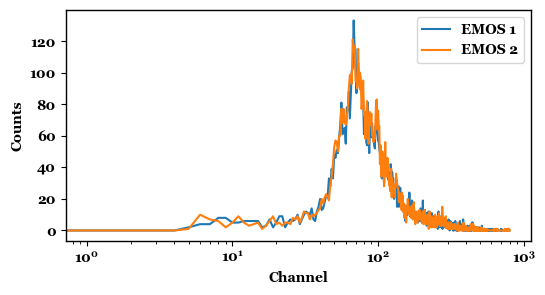

In [32]:
# Plot
plt.figure(figsize=(6,3))
plot_spectrum('/Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/EMOS1_spec_flare_final.fits', label='EMOS 1')
plot_spectrum('/Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/EMOS2_spec_flare_final.fits', label='EMOS 2')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.xscale('log')
plt.legend()
plt.show()

## Inclusive Quiescent

In [33]:
# EMOS 1

# Parameters
q_flag       = "#XMMEA_EMOS1" # Quality flag
n_pattern    = 12           # Pattern selection. Should be 12 for MOS detectors
region_1     = (24475.391, 24618.401)
radius       = 800
bkg_1        = (24475.391, 21000.5)
bkg_radius   = 1400
spec_min     = 0
spec_max     = 11999
bin_size     = 15
time_min     = t1
time_max     = t_end

# Input Files
work_dir           = '/Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/'
event_file         = '0327_0101440801_EMOS1_S001_ImagingEvts.ds'
# Output Files
source_file        = 'Quiet_Testing/EMOS1_spec_inquiet.fits'
bkg_file           = 'Quiet_Testing/EMOS1_bkg_spec_inquiet.fits'
response_file      = 'Quiet_Testing/EMOS1_inquiet.rmf'
ancillary_file     = 'Quiet_Testing/EMOS1_inquiet.anc'
final_file         = 'Quiet_Testing/EMOS1_spec_inquiet_final.fits'

# Extract
extract_spectrum(q_flag, n_pattern, bin_size, region_1, radius, bkg_1, bkg_radius, spec_min, spec_max,
                 work_dir, event_file, source_file, bkg_file, response_file, ancillary_file, final_file,
                 time_min=time_min, time_max=time_max)



Checking for Event Files...


File 0327_0101440801_EMOS1_S001_ImagingEvts.ds exists. 



Extracting source spectrum...


Executing: 
evselect table='0327_0101440801_EMOS1_S001_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EMOS1&&(PATTERN<=12) && ((X,Y) IN circle(24475.391,24618.401,800)) && (117446000 < TIME) && (TIME < 117552515.136132)' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimage

In [34]:
# EMOS 2

# Parameters
q_flag       = "#XMMEA_EMOS2" # Quality flag
n_pattern    = 12           # Pattern selection. Should be 12 for MOS detectors
region_2     = (24476.384, 24620.342)
radius       = 800.
bkg_2        = (24476.384, 21000.5) 
bkg_radius   = 1800.
spec_min     = 0
spec_max     = 11999
bin_size     = 15
time_min     = t1
time_max     = t_end

# Input Files
work_dir           = '/Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/'
event_file         = '0327_0101440801_EMOS2_S002_ImagingEvts.ds'
# Output Files
source_file        = 'Quiet_Testing/EMOS2_spec_inquiet.fits'
bkg_file           = 'Quiet_Testing/EMOS2_bkg_spec_inquiet.fits'
response_file      = 'Quiet_Testing/EMOS2_inquiet.rmf'
ancillary_file     = 'Quiet_Testing/EMOS2_inquiet.anc'
final_file         = 'Quiet_Testing/EMOS2_spec_inquiet_final.fits'

extract_spectrum(q_flag, n_pattern, bin_size, region_2, radius, bkg_2, bkg_radius,spec_min,
                 spec_max, work_dir, event_file, source_file,bkg_file,response_file,ancillary_file, final_file,
                 time_min=time_min, time_max=time_max)



Checking for Event Files...


File 0327_0101440801_EMOS2_S002_ImagingEvts.ds exists. 



Extracting source spectrum...


Executing: 
evselect table='0327_0101440801_EMOS2_S002_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EMOS2&&(PATTERN<=12) && ((X,Y) IN circle(24476.384,24620.342,800.0)) && (117446000 < TIME) && (TIME < 117552515.136132)' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withima

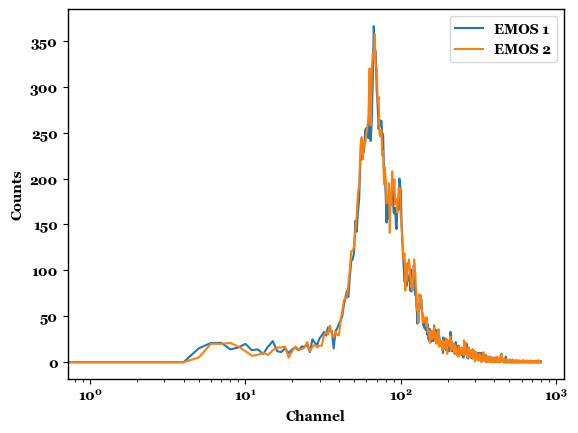

In [35]:
# Plot
plt.figure()
plot_spectrum('Quiet_Testing/EMOS1_spec_inquiet_final.fits', label='EMOS 1')
plot_spectrum('Quiet_Testing/EMOS2_spec_inquiet_final.fits', label='EMOS 2')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.xscale('log')
plt.legend()
plt.show()

## Exclusive Quiescent

In [37]:
# EMOS 1
# Quiet is from time t1 to t2, t3 to t4, ang t5 to t_end

# Parameters
q_flag       = "#XMMEA_EMOS1" # Quality flag
n_pattern    = 12           # Pattern selection. Should be 12 for MOS detectors
region_1     = (24475.391, 24618.401)
radius       = 800
bkg_1        = (24475.391, 21000.5)
bkg_radius   = 1400
spec_min     = 0
spec_max     = 11999
bin_size     = 15

# Input Files
work_dir           = '/Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/'
event_file         = '0327_0101440801_EMOS1_S001_ImagingEvts.ds'
# Output Files
source_file        = 'Quiet_Testing/EMOS1_spec_exquiet.fits'
bkg_file           = 'Quiet_Testing/EMOS1_bkg_spec_exquiet.fits'
response_file      = 'Quiet_Testing/EMOS1_exquiet.rmf'
ancillary_file     = 'Quiet_Testing/EMOS1_exqiuet.anc'
final_file         = 'Quiet_Testing/EMOS1_spec_exquiet_final.fits'

# Extract - Special Case

# Open the event file
eventfile = work_dir + event_file

print("\n\nChecking for Event Files...\n\n")

# Extract the source spectrum
# - - - - - - - - - - - - - - - - - - -
print('\n\nExtracting source spectrum...\n\n')
source_file = work_dir + source_file  # Name of the output source spectrum

# Arguments of SAS Command

expression = f'{q_flag}&&(PATTERN<={n_pattern}) && ((X,Y) IN circle({region_1[0]},{region_1[1]},{radius}))'  # event filter expression
print(expression)

time_expression = f'&& (  ( ({t1} < TIME) && (TIME < {t2}) ) ||  ( ({t3} < TIME) && (TIME < {t4}) ) || ( ( {t5} < TIME) && (TIME < {t_end}) ) )'
# time_expression = f'&& ((({t1} < TIME) && (TIME < {t2})) ||  ( ({t3} < TIME) && (TIME < {t4}) ))'


expression = expression + time_expression
print(expression)

inargs = [f'table={event_file}', 'withspectrumset=yes', f'spectrumset={source_file}', 'energycolumn=PI',
              f'spectralbinsize={bin_size}', f'specchannelmin={spec_min}', f'specchannelmax={spec_max}',
              f'expression={expression}']

# Execute the SAS task with the parameters to produce the source spectrum
w("evselect", inargs).run()

# Extract the background spectrum
# - - - - - - - - - - - - - - - - -
print('\n\nExtracting background spectrum...\n\n')
bkg_file = work_dir + bkg_file  # Name of the output background spectrum

# Arguments of SAS Command
expression = f'{q_flag}&&(PATTERN<={n_pattern}) && ((X,Y) IN circle({bkg_1[0]},{bkg_1[1]},{bkg_radius}))  && ({time_min} < TIME) && (TIME < {time_max})'

expression = expression + time_expression
print(expression)

inargs = [f'table={event_file}', 'withspectrumset=yes', f'spectrumset={bkg_file}', 'energycolumn=PI',
          f'spectralbinsize={bin_size}', f'specchannelmin={spec_min}', f'specchannelmax={spec_max}',
          f'expression={expression}']

# Execute the SAS task with the parameters to produce the background spectrum
w("evselect", inargs).run()

# Backscale source spectrum
# - - - - - - - - - - - - - - - - - -

inargs = [f'spectrumset={source_file}', f'badpixlocation={event_file}']

print("\n\nBackscaling source spectrum...\n\n")

w("backscale", inargs).run()

# Backscale background spectrum
# - - - - - - - - - - - - - - - - - -

inargs = [f'spectrumset={bkg_file}', f'badpixlocation={event_file}']

print("\n\nBackscaling background spectrum...\n\n")

w("backscale", inargs).run()

# Generate response file
# - - - - - - - - - - - - - - - - - -
response_file = work_dir + response_file  # Name of the output redistribution

# Arguments of SAS Command
inargs = [f'spectrumset={source_file}', f'rmfset={response_file}']

print("\n\nGenerating Response File...\n\n")

w("rmfgen", inargs).run()

# Generate ancillary file
# - - - - - - - - - - - - - -
ancillary_file = work_dir + ancillary_file  # Name of the output ancillary

# SAS Command
cmd = "arfgen"  # SAS task to be executed

# Arguments of SAS Command
inargs = [f'spectrumset={source_file}', f'arfset={ancillary_file}',
          'withrmfset=yes', f'rmfset={response_file}', f'badpixlocation={event_file}', 'detmaptype=psf']

print("\n\nGenerating ancillary file...\n\n")

w("arfgen", inargs).run()

# Finalize spectrum
# - - - - - - - - - - - - - -
output_file = work_dir + final_file  # Name of the output specgruop

# Arguments of SAS Command
inargs = [f'spectrumset={source_file}', 'mincounts=25', 'oversample=3',
          f'rmfset={response_file}', f'arfset={ancillary_file}',
          f'backgndset={bkg_file}', f'groupedset={output_file}']

print("\n\nFinalizing spectrum...\n\n")

w("specgroup", inargs).run()



Checking for Event Files...




Extracting source spectrum...


#XMMEA_EMOS1&&(PATTERN<=12) && ((X,Y) IN circle(24475.391,24618.401,800))
#XMMEA_EMOS1&&(PATTERN<=12) && ((X,Y) IN circle(24475.391,24618.401,800))&& (  ( (117446000 < TIME) && (TIME < 117469000) ) ||  ( (117493000 < TIME) && (TIME < 117506000) ) || ( ( 117526000 < TIME) && (TIME < 117552515.136132) ) )
Executing: 
evselect table='0327_0101440801_EMOS1_S001_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EMOS1&&(PATTERN<=12) && ((X,Y) IN circle(24475.391,24618.401,800))&& (  ( (117446000 < TIME) && (TIME < 117469000) ) ||  ( (117493000 < TIME) && (TIME < 117506000) ) || ( ( 117526000 < TIME) && (TIME < 117552515.136132) ) )' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' 

In [38]:
# EMOS 2
# Quiet is from time t1 to t2, t3 to t4, ang t5 to t_end

# Parameters
q_flag       = "#XMMEA_EMOS2" # Quality flag
n_pattern    = 12           # Pattern selection. Should be 12 for MOS detectors
region_1     = (24475.391, 24618.401)
radius       = 800
bkg_1        = (24475.391, 21000.5)
bkg_radius   = 1400
spec_min     = 0
spec_max     = 11999
bin_size     = 15

# Input Files
work_dir           = '/Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/'
event_file         = '0327_0101440801_EMOS2_S002_ImagingEvts.ds'
# Output Files
source_file        = 'Quiet_Testing/EMOS2_spec_exquiet.fits'
bkg_file           = 'Quiet_Testing/EMOS2_bkg_spec_exquiet.fits'
response_file      = 'Quiet_Testing/EMOS2_exquiet.rmf'
ancillary_file     = 'Quiet_Testing/EMOS2_exqiuet.anc'
final_file         = 'Quiet_Testing/EMOS2_spec_exquiet_final.fits'

# Extract - Special Case

# Open the event file
eventfile = work_dir + event_file

print("\n\nChecking for Event Files...\n\n")

# Extract the source spectrum
# - - - - - - - - - - - - - - - - - - -
print('\n\nExtracting source spectrum...\n\n')
source_file = work_dir + source_file  # Name of the output source spectrum

# Arguments of SAS Command

expression = f'{q_flag}&&(PATTERN<={n_pattern}) && ((X,Y) IN circle({region_1[0]},{region_1[1]},{radius}))'  # event filter expression
print(expression)

time_expression = f'&& (  ( ({t1} < TIME) && (TIME < {t2}) ) ||  ( ({t3} < TIME) && (TIME < {t4}) ) || ( ( {t5} < TIME) && (TIME < {t_end}) ) )'
# time_expression = f'&& ((({t1} < TIME) && (TIME < {t2})) ||  ( ({t3} < TIME) && (TIME < {t4}) ))'


expression = expression + time_expression
print(expression)

inargs = [f'table={event_file}', 'withspectrumset=yes', f'spectrumset={source_file}', 'energycolumn=PI',
              f'spectralbinsize={bin_size}', f'specchannelmin={spec_min}', f'specchannelmax={spec_max}',
              f'expression={expression}']

# Execute the SAS task with the parameters to produce the source spectrum
w("evselect", inargs).run()

# Extract the background spectrum
# - - - - - - - - - - - - - - - - -
print('\n\nExtracting background spectrum...\n\n')
bkg_file = work_dir + bkg_file  # Name of the output background spectrum

# Arguments of SAS Command
expression = f'{q_flag}&&(PATTERN<={n_pattern}) && ((X,Y) IN circle({bkg_1[0]},{bkg_1[1]},{bkg_radius}))  && ({time_min} < TIME) && (TIME < {time_max})'

expression = expression + time_expression
print(expression)

inargs = [f'table={event_file}', 'withspectrumset=yes', f'spectrumset={bkg_file}', 'energycolumn=PI',
          f'spectralbinsize={bin_size}', f'specchannelmin={spec_min}', f'specchannelmax={spec_max}',
          f'expression={expression}']

# Execute the SAS task with the parameters to produce the background spectrum
w("evselect", inargs).run()

# Backscale source spectrum
# - - - - - - - - - - - - - - - - - -

inargs = [f'spectrumset={source_file}', f'badpixlocation={event_file}']

print("\n\nBackscaling source spectrum...\n\n")

w("backscale", inargs).run()

# Backscale background spectrum
# - - - - - - - - - - - - - - - - - -

inargs = [f'spectrumset={bkg_file}', f'badpixlocation={event_file}']

print("\n\nBackscaling background spectrum...\n\n")

w("backscale", inargs).run()

# Generate response file
# - - - - - - - - - - - - - - - - - -
response_file = work_dir + response_file  # Name of the output redistribution

# Arguments of SAS Command
inargs = [f'spectrumset={source_file}', f'rmfset={response_file}']

print("\n\nGenerating Response File...\n\n")

w("rmfgen", inargs).run()

# Generate ancillary file
# - - - - - - - - - - - - - -
ancillary_file = work_dir + ancillary_file  # Name of the output ancillary

# SAS Command
cmd = "arfgen"  # SAS task to be executed

# Arguments of SAS Command
inargs = [f'spectrumset={source_file}', f'arfset={ancillary_file}',
          'withrmfset=yes', f'rmfset={response_file}', f'badpixlocation={event_file}', 'detmaptype=psf']

print("\n\nGenerating ancillary file...\n\n")

w("arfgen", inargs).run()

# Finalize spectrum
# - - - - - - - - - - - - - -
output_file = work_dir + final_file  # Name of the output specgruop

# Arguments of SAS Command
inargs = [f'spectrumset={source_file}', 'mincounts=25', 'oversample=3',
          f'rmfset={response_file}', f'arfset={ancillary_file}',
          f'backgndset={bkg_file}', f'groupedset={output_file}']

print("\n\nFinalizing spectrum...\n\n")

w("specgroup", inargs).run()



Checking for Event Files...




Extracting source spectrum...


#XMMEA_EMOS2&&(PATTERN<=12) && ((X,Y) IN circle(24475.391,24618.401,800))
#XMMEA_EMOS2&&(PATTERN<=12) && ((X,Y) IN circle(24475.391,24618.401,800))&& (  ( (117446000 < TIME) && (TIME < 117469000) ) ||  ( (117493000 < TIME) && (TIME < 117506000) ) || ( ( 117526000 < TIME) && (TIME < 117552515.136132) ) )
Executing: 
evselect table='0327_0101440801_EMOS2_S002_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EMOS2&&(PATTERN<=12) && ((X,Y) IN circle(24475.391,24618.401,800))&& (  ( (117446000 < TIME) && (TIME < 117469000) ) ||  ( (117493000 < TIME) && (TIME < 117506000) ) || ( ( 117526000 < TIME) && (TIME < 117552515.136132) ) )' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' 

# Plot & Compare

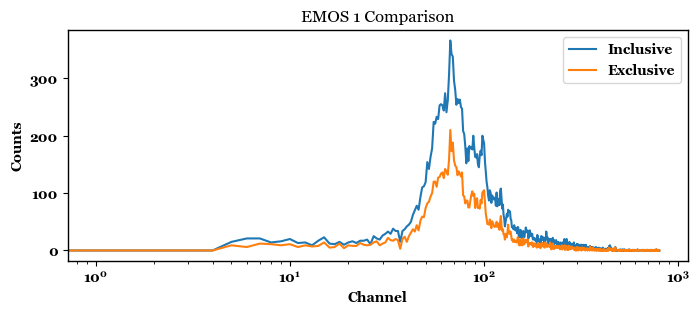

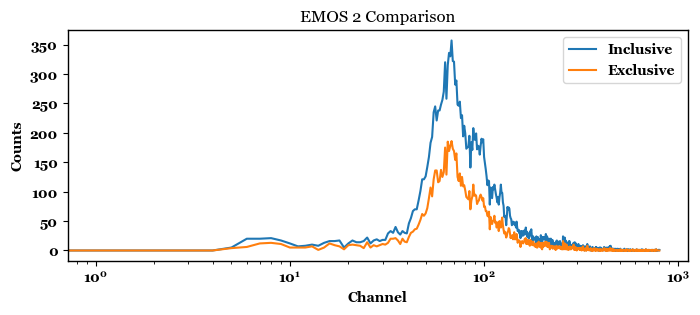

In [43]:
plt.figure(figsize=(8,3))
plot_spectrum('Quiet_Testing/EMOS1_spec_inquiet_final.fits', label='Inclusive')
plot_spectrum('Quiet_Testing/EMOS1_spec_exquiet_final.fits', label='Exclusive')
plt.legend(loc='upper right')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.xscale('log')
plt.title('EMOS 1 Comparison')
plt.show()

plt.figure(figsize=(8,3))
plot_spectrum('Quiet_Testing/EMOS2_spec_inquiet_final.fits', label='Inclusive')
plot_spectrum('Quiet_Testing/EMOS2_spec_exquiet_final.fits', label='Exclusive')
plt.legend(loc='upper right')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.xscale('log')
plt.title('EMOS 2 Comparison')
plt.show()